<a href="https://colab.research.google.com/github/JasferI/machine-learning/blob/main/naivebayesalgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [2]:
df=pd.read_csv("card_transdata.csv")

In [3]:
jj=df.head(10000)
jj

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,4.225100,2.678220,0.556858,1.0,0.0,0.0,1.0,0.0
9996,3.614858,0.431593,0.061778,1.0,0.0,0.0,1.0,0.0
9997,10.131863,10.262508,2.818090,1.0,0.0,0.0,1.0,0.0
9998,16.306236,0.014054,1.904495,1.0,0.0,0.0,1.0,0.0


In [ ]:
jj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  float64
 4   used_chip                       10000 non-null  float64
 5   used_pin_number                 10000 non-null  float64
 6   online_order                    10000 non-null  float64
 7   fraud                           10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [ ]:
jj.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

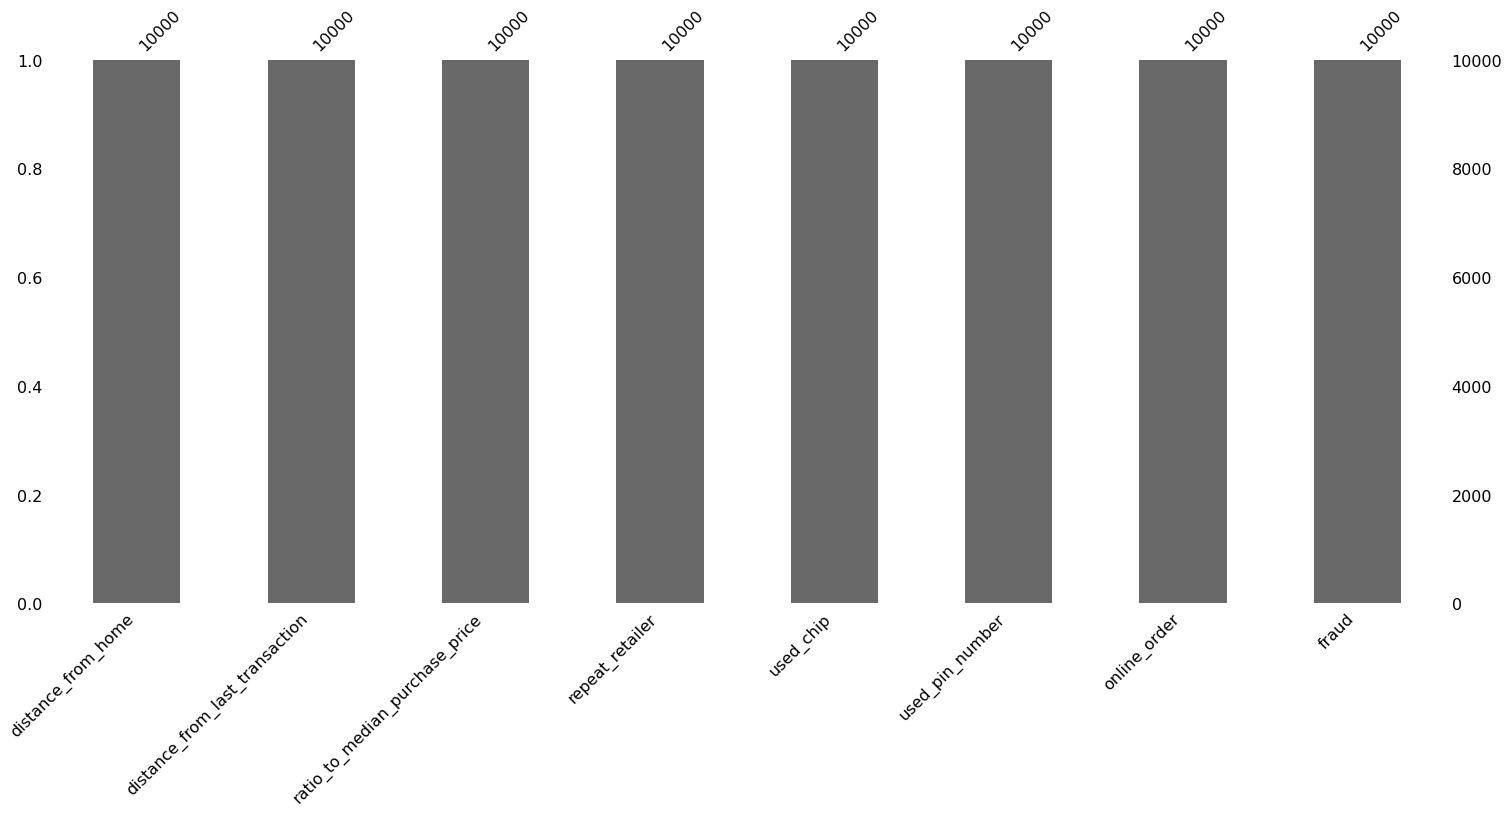

In [ ]:
import missingno as mn
mn.bar(jj)
plt.show()

In [ ]:
X=jj.drop('fraud',axis=1)
Y=jj['fraud']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=0)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

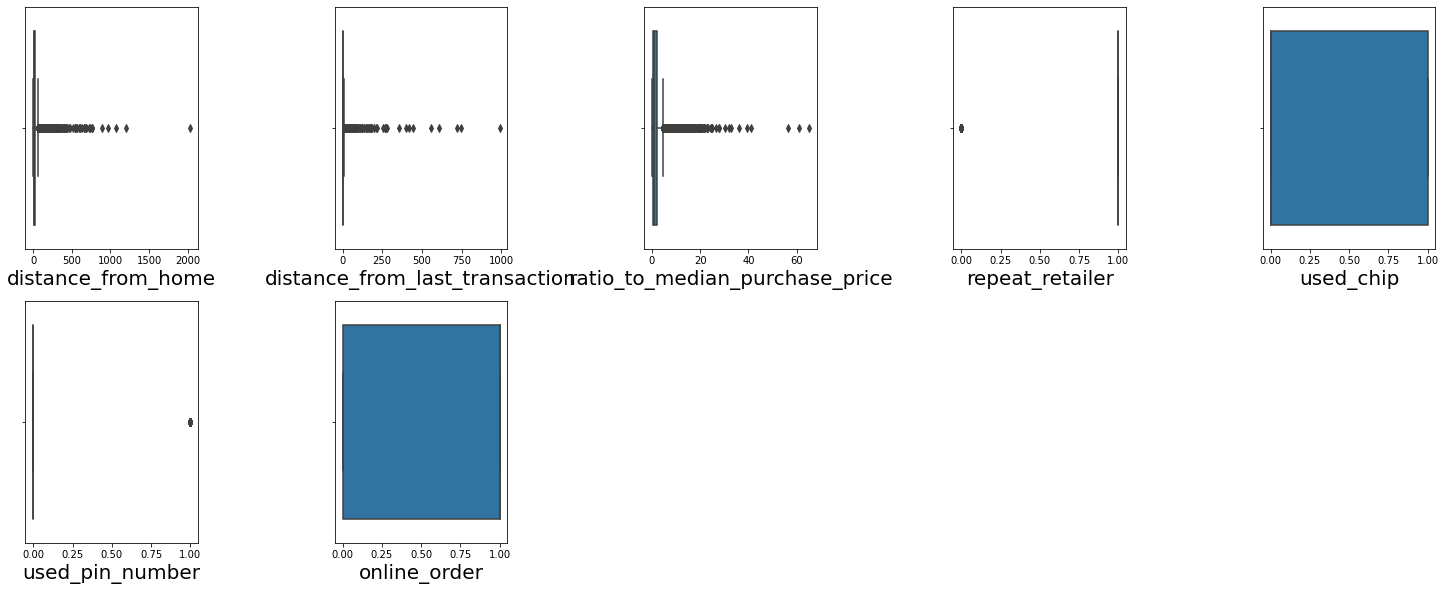

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
plotnumber=1
for col in X.columns:
  if plotnumber<=7:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(X[col])
    plt.xlabel(col,fontsize= 20)
  plotnumber+=1
plt.tight_layout()
plt.show()  

In [ ]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in X.columns:
  if plotnumber<=7:
    ax=plt.subplot(5,5,plotnumber)
    plt.stem(X[col])
    plt.xlabel(col,fontsize= 20)
  plotnumber+=1
plt.tight_layout()
plt.show()  

<ipython-input-12-60f020cc382b>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(X[col])
<ipython-input-12-60f020cc382b>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(X[col])
<ipython-input-12-60f020cc382b>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_c

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f73e64ace50> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
a=StandardScaler()
X_train=a.fit_transform(X_train)
X_test=a.transform(X_test)

In [ ]:
#ALGORITHM:------
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[4556,    3],
       [   8,  433]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

0.9978

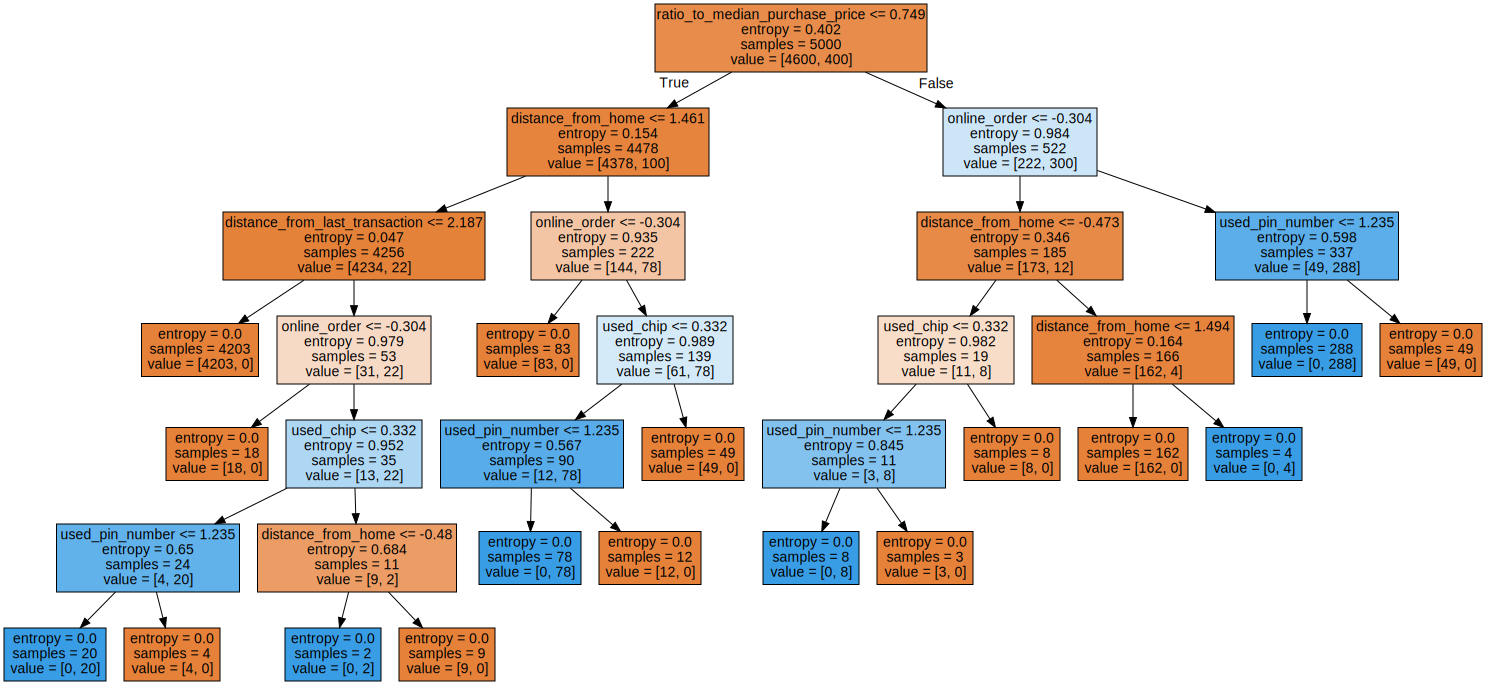

In [ ]:
from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))


In [ ]:
a=StandardScaler()
X_train=a.fit_transform(X_train)
X_test=a.transform(X_test)

In [ ]:
#NAIVE BAYES
clf1=GaussianNB()
clf1.fit(X_train,Y_train)

GaussianNB()

In [ ]:
Y_pred=clf1.predict(X_test)

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[2056, 2503],
       [  14,  427]])

In [ ]:
from sklearn.metrics import accuracy_score

0.4966

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf1 = GaussianNB()

In [ ]:
clf1.fit(X_train,Y_train)

GaussianNB()

In [ ]:
Y_pred=clf1.predict(X_test)

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[2056, 2503],
       [  14,  427]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

0.8998